In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

import seaborn as sns; sns.set()

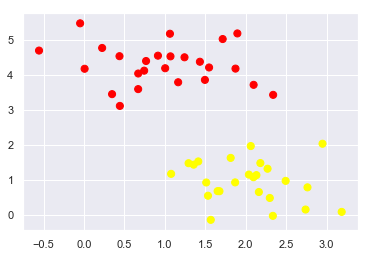

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std =0.60)
plt.scatter(X[:, 0], X[:, 1], s = 50, c = y, cmap = 'autumn' )

(-1, 3.5)

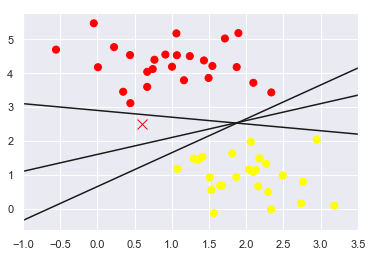

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], s= 50, c= y, cmap = 'autumn')
plt.plot(0.6, 2.5, 'x', color = 'red', markersize = 10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m*xfit + b, 'k')
    
plt.xlim(-1, 3.5)

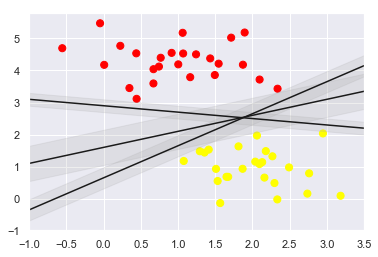

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], s= 50, c= y, cmap = 'autumn')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m* xfit + b
    plt.plot(xfit, yfit, 'k')
    plt.fill_between(xfit, yfit + d, yfit - d, color = '#AAAAAA', alpha =0.2)
    
plt.xlim(-1, 3.5);

In [6]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
np.meshgrid?

In [8]:
def plot_svc_decision_function(model, ax = None, plot_support =True):
    """"Plot the decision function for a 2D SVC"""
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    
    

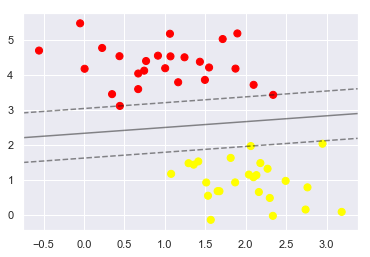

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

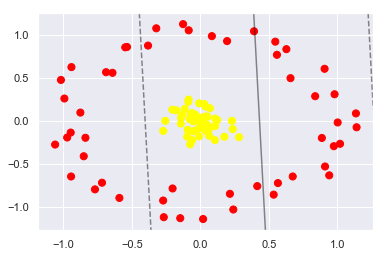

In [10]:
from sklearn.datasets.samples_generator import make_circles 
X, y = make_circles(100, factor =.1, noise =.1)

clf = SVC(kernel = 'linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], s = 50, c = y, cmap = 'autumn')
plot_svc_decision_function(clf, plot_support = False);

In [11]:
r = np.exp(-(X**2).sum(1))

In [12]:
clf = SVC(kernel = 'rbf', C = 1E6)
clf.fit(X, y)

C:\Users\damia\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

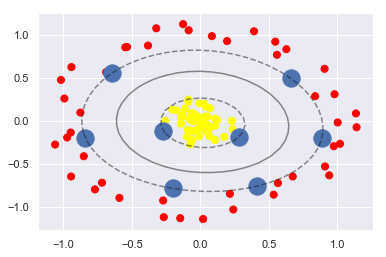

In [13]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 300, lw = 1)

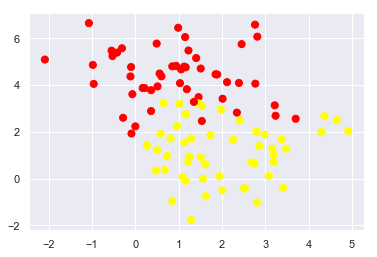

In [14]:
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 1.2)
plt.scatter (X[:, 0], X[:, 1], c=y, s= 50, cmap ='autumn')

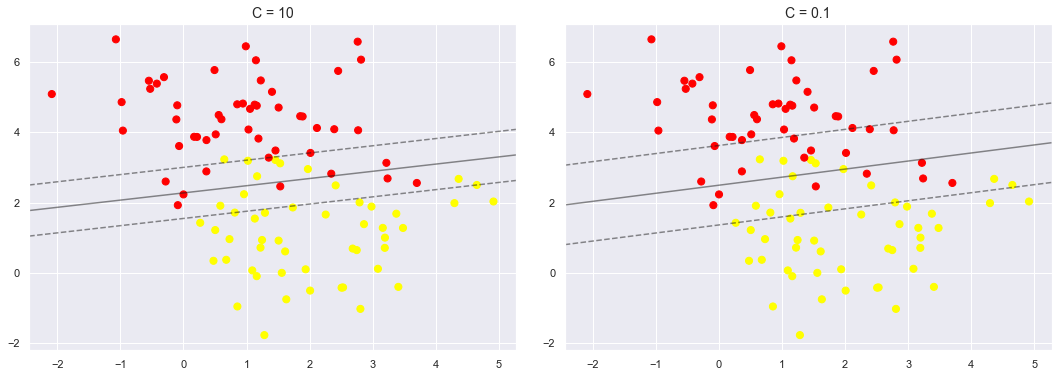

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10, 0.1]):
    model = SVC(kernel = 'linear', C = C).fit(X, y)
    
    axi.scatter(X[:, 0], X[:, 1], c=y, s= 50, cmap ='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 300, lw = 1, facecolor = 'none')
    axi.set_title('C = {}'.format(C), size = 14)
    

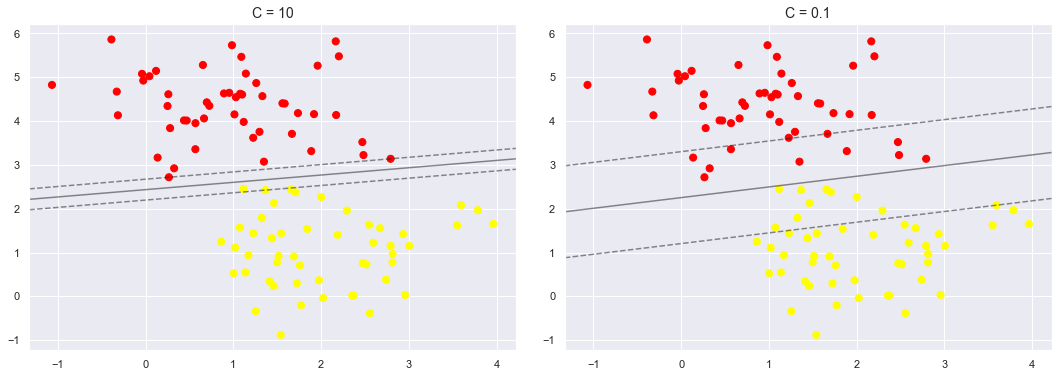

In [16]:
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8)

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10, 0.1]):
    model = SVC(kernel = 'linear', C = C).fit(X, y)
    
    axi.scatter(X[:, 0], X[:, 1], c=y, s= 50, cmap ='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 300, lw = 1, facecolor = 'none')
    axi.set_title('C = {}'.format(C), size = 14)
    

# Facial Recognition 

In [17]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder' 'Junichiro Koizumi']
(820, 62, 47)


In [18]:
fig.subplots_adjust?

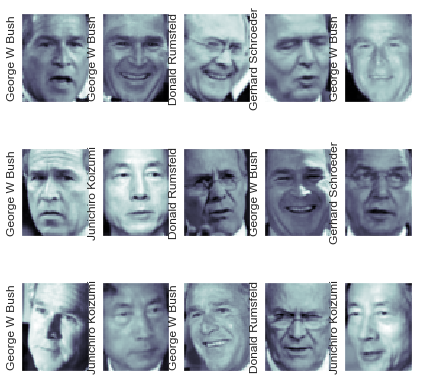

In [30]:
fig, ax = plt.subplots(3, 5, figsize = (7, 7))
#fig.subplots_adjust(hspace = .5, wspace = .5)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'bone')
    axi.set(xticks = [], yticks = [])
    axi.set_ylabel(faces.target_names[faces.target[i]])

In [21]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components = 150, whiten = True, random_state = 42)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')
model = make_pipeline(pca, svc)

In [22]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C' : [1, 5, 10, 15], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, Ytrain)
print(grid.best_params_)

C:\Users\damia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 1min 17s
{'svc__C': 1, 'svc__gamma': 0.005}


In [24]:
model = grid.best_estimator_
Yfit = model.predict(Xtest)

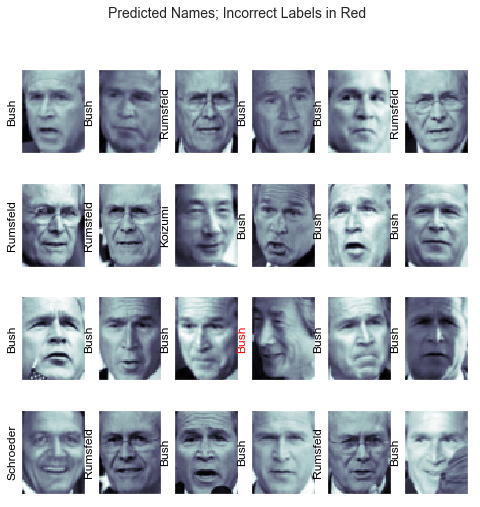

In [31]:
fig, ax = plt.subplots(4, 6, figsize = (8, 8))

for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap = 'bone')
    axi.set(xticks = [], yticks = [])
    axi.set_ylabel(faces.target_names[Yfit[i]].split()[-1], 
                   color = 'black' if Yfit[i] == Ytest[i] else 'red' )
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [26]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, Yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

  Donald Rumsfeld       0.91      0.83      0.87        36
    George W Bush       0.89      0.98      0.93       128
Gerhard Schroeder       0.92      0.82      0.87        28
Junichiro Koizumi       1.00      0.46      0.63        13

        micro avg       0.90      0.90      0.90       205
        macro avg       0.93      0.77      0.82       205
     weighted avg       0.90      0.90      0.89       205



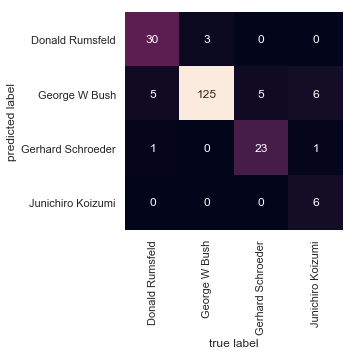

In [33]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Ytest, Yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');